# Random walks : Solutions to problem sets
## Priya Gopal 10/25/2018

What can we do with Random numbers?
 A problem in physics, closely related to the Brownian motion can me computationally modeled using that of a "random walker" A hypothetical drunk walker starts walking from the pub and can only take regularly spaced positions along a line which are $\Delta$x apart. At any time, he can take a step left, or a step right. Assume $\Delta$x is 1. The probability of moving in either direction is thus symmetric 0.5. 

Questions:

1. How does the trajectory of the walker look with time? 
2. What is the net displacement of the walker? $<x_N>$, 
3. What is the variance $<\Delta x{^2}_N>$ going to be?
4. How do we calculate the probability for the walker to be at position (x) after N steps, P$_N$(x)

Coding:
 Write a program in python to simulate a single random walker in 1 D space.
 
 Setup:
  Initial location of walker is x=0,at t=0. Step size is +1 or -1 selected randomly along the x-axis. Probability is 0.5 to move left or right. Try to use functions. It makes it easier. 
  
Simulations:  
 1. Run N Simulations and plot the trajectory of the walker with time.
 2. Calculate the variance and plot it as a function of N. What is the behaviour?
 3. Change N to see the dependence.
 4. What happens to the trajectory if we have a weighted probability, p=0.1, q= 0.9? i.e. the probability of going to the right is more than the left. Compute the average displacement and the variance for this case. 
 5. Try to find the probablity of walker to be in position (x) after N steps. ( We can do this using a histogram) Plot the distribution as funtion of time and comment! Hint: For larger values of N and more trials, the distribution should be gaussian.

In [ ]:
###code to simulate a 1D random walk. 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define the function
# Initial conditions are probability of moving right =left =0.5. So set prob = 0.5, This is the condition used to move right or left
prob=0.5 # can step left or right equally
nsteps=100 # define the number of steps, equal to the time evolution of the walk
# Need to store the walk in an array. 
x=np.zeros(nsteps) # position Maximum size of the array is not more than the number of steps taken
xsq=np.zeros(nsteps)
#def randomwalk1D():

# Evolution for 1 walk through nsteps
for i in range(1,nsteps):
    # choose the probability, generate random number between 0 and 1 
    cointoss=np.random.rand()
    # action based on condition
    if cointoss < prob:
        step = -1 # backward
    else:
        step = +1 # forward
    #update the position array from where we were last time, at t=0, x=0 Since we update the position at t=i, from step i-1, we start at index 1 in the for loop
    
    x[i]=x[i-1]+step
    xsq[i]=np.square(x[i])
# Plot the trajectory, this is for one walk of nsteps
steps=np.arange(0,nsteps,1) # intervals of delta(x)=1
plt.plot(steps,x)
#plt.plot(steps,x*x)
plt.xlabel("number of steps")
plt.ylabel("position")

# What is the average displacement of the walker after N steps in one walk?
print (x[nsteps-1]) 


In the above example, the mean displacement for probability of 0.5, is not zero. Theoretically, it should be around 0. 
For any stochastic method, we always need to average over many trials, in this case,many walks. So need another loop for averaging over walks.

The net displacement of the walked after N steps in one walk is just the sum of the position 



In [ ]:
# Above plot is the trajectory for one walk only. if we run this function 100 times, the trajectories will change. We can see this by plotting various
# in the above example, if we define the function randomwalk1D and call this 100times, 
###code to simulate a 1D random walk. 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import pylab
#from collections import Counter

# Define the function which can be called for multiple walks.
# Initial conditions are probability of moving right =left =0.5. So set prob = 0.5, This is the condition used to move right or left
#prob=0.5 # can step left or right equally
#nsteps=10 # define the number of steps, equal to the time evolution of the walk
# Need to store the walk in an array. 
 # position Maximum size of the array is not more than the number of steps taken

def randomwalk1D(nsteps,plot=True):
    xsum=0.0
    prob=0.5
    #pocc=0.0
    
    x=np.zeros(nsteps)
    for i in range(1,nsteps):
        cointoss=np.random.rand()
        
        if cointoss < prob:
            step = -1 # backward
        else:
            step = +1 # forward
        x[i]=x[i-1]+step
    #print (x)
    

# Plot the trajectory, this is for one walk of nsteps
    if(plot==True):
        steps=np.arange(0,nsteps,1) # intervals of delta(x)=1
        plt.plot(steps,x)
        plt.xlabel("number of steps")
        plt.ylabel("position")

        
randomwalk1D(10,True) # function can be called for 100 walks to get the average..The one presented here might not be the best way. 

nwalks = 0 # number of walks to be taken for the average
while nwalks < 6:
    randomwalk1D(10,True)
        # How to store the position for every nwalks to take the probability? easier if we define an array with two indices
    nwalks=nwalks+1


In [ ]:
## How to store the values for every walk and every nstep for finding the probability of occupation of every site. We can average over the walks and steps and define a two
## dimensional array with the first index for walk no and the second index for the position updated with every coin toss
# Above plot is the trajectory for one walk only. if we run this function 100 times, the trajectories will change. We can see this by plotting various
# in the above example, if we define the function randomwalk1D and call this 100times, 
###code to simulate a 1D random walk. 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import pylab
#from collections import Counter

# Define the function
# Initial conditions are probability of moving right =left =0.5. So set prob = 0.5, This is the condition used to move right or left
#prob=0.5 # can step left or right equally
#nsteps=10 # define the number of steps, equal to the time evolution of the walk
# Need to store the walk in an array. 
#x=np.zeros(nsteps) # position Maximum size of the array is not more than the number of steps taken
#position=np.zeros((nwalks,nsteps))
def randomwalk1D(nwalks,nsteps):
    prob=0.5
    position=np.zeros((nwalks,nsteps)) # store the position for every walk
    
    x=np.zeros(nsteps)
    #walk=0
    for walk in range(nwalks):
        steps=np.arange(0,nsteps,1)
        for i in range(1,nsteps):
            cointoss=np.random.rand()
            #print (cointoss)
            if cointoss < prob:
                step = -1 # backward
            else:
                step = +1 # forward
            position[walk,i]=position[walk,i-1]+step
    #for walk in range(nwalks):
    plt.plot(steps,position[walk,:],linewidth=1,alpha=0.5)
    plt.show()       
            #print (position)      

        
    
#randomwalk1D(10,10)
   
# for the probability of occupying a position "x" in N steps, the prob is given by counting the frequency of occurences over nwalks.
# suppose we want the probability of each of 20 steps over nwalks, we can plot the histogram, histogram automatically counts the probability



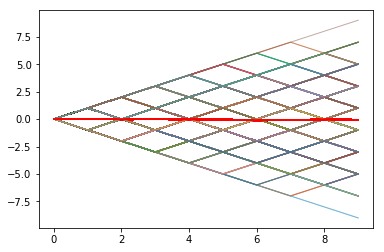

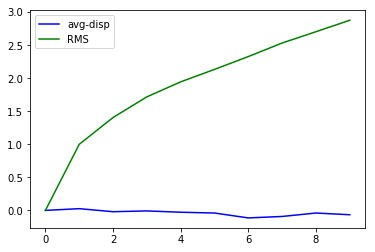

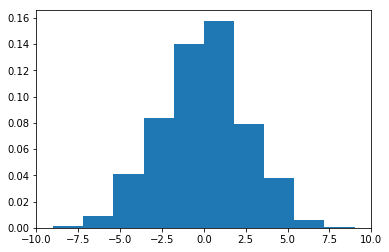

In [33]:
from __future__ import division,print_function
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import pylab
#from collections import Counter

# Define the function
# Initial conditions are probability of moving right =left =0.5. So set prob = 0.5, This is the condition used to move right or left
#prob=0.5 # can step left or right equally
#nsteps=10 # define the number of steps, equal to the time evolution of the walk
# Need to store the walk in an array. Define a position array with the first index, the walk and the second index the x-position
#position=np.zeros((nwalks,nsteps))
#x=np.zeros(nsteps) # position Maximum size of the array is not more than the number of steps taken


nwalks=1000
nsteps=10
prob=0.5
position=np.zeros((nwalks,nsteps)) # store the position for every walk
x=np.zeros(nsteps)
t=range(nsteps)
    #walk=0
xsum=np.zeros(nsteps)
x2sum=np.zeros(nsteps)
steps=np.arange(0,nsteps,1)  
xavg=0.0
mean_position=np.zeros(nsteps)
for walk in range(nwalks):
    for i in range(1,nsteps):
            cointoss=np.random.rand()
            #print (cointoss)
            if cointoss < prob:
                step = -1 # backward
            else:
                step = +1 # forward
            position[walk,i]=position[walk,i-1]+step
            #print(position[walk,1])
            xsum[i]=xsum[i]+position[walk,i]
            x2sum[i]=x2sum[i]+position[walk,i]**2
            mean_position[i]=np.mean(position[:,i])
            ## uncomment if you want to constrain your steps to only 10, (boundary conditions See how it varies the RMS)
            #if (position[walk,i])>10:
                #position[walk,i]=position[walk,10]
            #if (position[walk,i])<-10:
                #position[walk,i]=position[walk,-10]
for walk in range(nwalks):
    plt.plot(t, position[walk,:],linewidth=1,alpha=0.5)
    plt.xlabel=("steps")
    plt.ylabel=("position")
    plt.plot(t, mean_position, 'r-')
plt.show()                
xavg=[float(i)/float(nwalks) for i in xsum]
RMS = [np.sqrt((i)/float(nwalks)) for i in x2sum]  
plt.plot(t,xavg,'b-',label='avg-disp')
plt.plot(t,RMS, 'g-',label='RMS')
plt.legend(loc='upper left')
plt.title=("average and RMS")
plt.show()
       
    
# for the probability of occupying a position "x" in N steps, the prob is given by counting the frequency of occurences over nwalks.
# For plotting the distribution of N=20 steps, create a histogram with the xlim going from (-20,20) Count all the ocurences for N<20, and then normalize it for Pocc
#print ("probability distribution ")
#plt.hist(position[:,nsteps-1],bins=20,normed=True)
plt.hist(position[:,nsteps-1],normed=True)
plt.title=("probability distribution for p=0.5")
plt.xlabel=("position")
plt.ylabel=("probability")
plt.xlim([-nsteps,nsteps])
plt.show()

#

The histogram has a Gaussian behaviour centered around zero if p=0.5, if we change this, we see the peak of the curve shift. The RMS also has a linear behaviour with the number of steps.

In [ ]:
# Walk.py, A 2D Random Walk, Notebook Verssion

from __future__ import division,print_function
import iVisual  
from IPython.display import IFrame
import random
from numpy import *

scene=canvas(title="Walk 2D")
scene.width=500
scene.height=500
scene.range=35
walk=curve(color=color.yellow,radius=0.1)
jmax=10000
x=0
y=0
#walk.pos=(0,0)
for i in range(0,jmax):
    x += 2.0*random.random()-1
    y += 2*random.random()-1
    walk.append(pos=(x,y,0))
       
xaxs=curve(pos=[(0,0,0),(0,30,0)],radius=0.2)

yaxs=curve(pos=[(0,0,0),(30,0,0)],radius=0.2)
xlb=label(x=45,y=3,text ="x",height=20) 
ylb=label(x=10,y=30,text ="y",height=20)  
R=sqrt(x*x+y*y)
rlb=label(pos=(-30,25,0),height=20)
message="Distance from origin "
message +="%.2f"%R
rlb.text=message

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

jmax=10000
x=0
y=0
#walk.pos=(0,0)
for i in range(0,jmax):
    x += 2.0*random.random()-1
    y += 2*random.random()-1
    walk.append(pos=(x,y,0))
       
xaxs=curve(pos=[(0,0,0),(0,30,0)],radius=0.2)

yaxs=curve(pos=[(0,0,0),(30,0,0)],radius=0.2)
xlb=label(x=45,y=3,text ="x",height=20) 
ylb=label(x=10,y=30,text ="y",height=20)  
R=sqrt(x*x+y*y)
rlb=label(pos=(-30,25,0),height=20)
message="Distance from origin "
message +="%.2f"%R
rlb.text=message

### Practical problem:
Brownian motion is the motion of a particle such as smoke or dust as it is colliding with gas molecules. Extend or modify the Walk2D.py above to contain the particle to a box of size "L". It is thus confined to "LxL" square grid. At each step, choose a random direction (up,down,right,left). Initial position of the particle is in the middle. (It is better to use a odd number grid)

Condition: The particle is confined to the box, If it tries to do so, choose a new random direction to move in. 

Simulation: Plot the trajectory and also the average distance square as function of N.

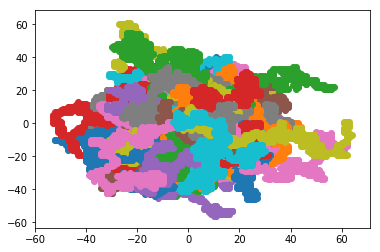

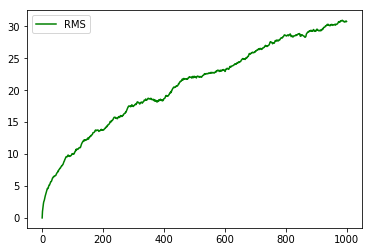

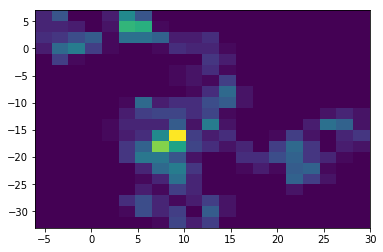

In [38]:
# 2D random walk with fixed step size +1 or -1 but now we have four directions.. left, right, up, down. This is also 
# termed as lattice random walk in the Von-Neumann neighborhood. The probability is now 0.25 for each step.

import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sys
#from numpy.random import RandomState

# initialize parameters  
dim=2 # 2Dimensional
nwalks = 100 # number of walks
nsteps = 1000  # number of steps
prob=0.25
t=range(nsteps)
rsum=np.zeros(nsteps)
r2sum=np.zeros(nsteps)
#steps=np.arange(0,nsteps,1)  
ravg=0.0
mean_position=np.zeros(nsteps)
directions =  ["up", "down", "left", "right"]
#position=np.zeros(nsteps,nsteps)
x=np.zeros(nsteps)
y=np.zeros(nsteps)
R=np.zeros(nsteps)
for walk in range(nwalks):
    x=np.zeros(nsteps)
    y=np.zeros(nsteps)
    R=np.zeros(nsteps) 
    for i in range(1,nsteps):
            start_direction=random.choice(directions)
            #print start_direction
            if start_direction=='left':
                x[i] = x[i - 1] -1
                y[i] = y[i - 1]
            elif start_direction=='right': 
                x[i] = x[i - 1] +1
                y[i] = y[i - 1]
            elif start_direction=='up': 
                x[i] = x[i - 1]
                y[i] = y[i - 1]+1
            elif start_direction=='down':
                x[i] = x[i - 1] 
                y[i] = y[i - 1]-1
            R[i]=R[i]+np.sqrt(x[i]**2+y[i]**2)
            #rsum[i]=rsum[i]+R[i]
            r2sum[i]=r2sum[i]+R[i]**2
    plt.scatter(x,y)  
plt.show()
   #mean_position[i]=np.mean(position[:,i])
for i in range(nwalks):
    #plt.scatter(x,y)
    plt.xlabel=("steps")
    plt.ylabel=("position")
    #plt.hist2d(x,y,bins=(20,20))
plt.show()
            

plt.show()
#ravg=[float(i)/float(nwalks) for i in rsum]
RMS = [np.sqrt((i)/float(nwalks)) for i in r2sum]  
#plt.plot(t,ravg,'b-',label='avg-disp')
plt.plot(t,RMS, 'g-',label='RMS')
plt.legend(loc='upper left')
plt.title=("average and RMS")
plt.show()

#How does the probability distribution look for a 2D random walk? Try plotting a heat map. Need to change this!.
plt.hist2d(x,y,bins=(20,20))
plt.show()

#Here is graph. Note improvement as number of trials increases.

Note: The mean-square displacement is again linear with the number of steps as in 1D random walks. 